In [6]:
import json
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter
from google_play_scraper import Sort, reviews, app
get_ipython().run_line_magic('matplotlib', 'inline')
get_ipython().run_line_magic('config', "InlineBackend.figure_format='retina'")
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [7]:
app_packages = [
  'com.anydo',
  'com.todoist',
  'com.ticktick.task',
  'com.habitrpg.android.habitica',
  'cc.forestapp',
  'com.oristats.habitbull',
  'com.levor.liferpgtasks',
  'com.habitnow',
  'com.microsoft.todos',
  'prox.lab.calclock',
  'com.gmail.jmartindev.timetune',
  'com.artfulagenda.app',
  'com.tasks.android',
  'com.appgenix.bizcal',
  'com.appxy.planner'
]

In [9]:
app_infos = []
for ap in tqdm(app_packages):
    info = app(ap, lang='en', country='us')
    del info['comments']
    app_infos.append(info)

100%|██████████| 15/15 [00:15<00:00,  1.06s/it]


In [10]:
app_reviews = []
for ap in tqdm(app_packages):
    for score in list(range(1, 6)):
        for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
            rvs, _ = reviews(
            ap,
            lang='en',
            country='us',
            sort=sort_order,
            count= 200 if score == 3 else 100,
            filter_score_with=score
            )
        for r in rvs:
            r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
            r['appId'] = ap
            app_reviews.extend(rvs)

100%|██████████| 15/15 [01:46<00:00,  7.10s/it]


In [11]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.to_csv('reviews.csv', index=None, header=True)

In [12]:
csv = 'reviews.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
reviewId,,,,,,,,,,,
gp:AOqpTOFqboFCH_Ry4AbNITOvhyEB6PUJFSHEhOKMxPqCJdr-rgJi1fMwkpYQtFpKaAMs6jB8b3JClsJ7oVF6UQ,Iman syah,https://play-lh.googleusercontent.com/a-/AOh14...,"hello, can you help me? im so frustrating with...",1,0,5.14.2.6,2021-07-02 22:39:12,NaN,NaN,newest,com.anydo
gp:AOqpTOF04AnjWDqCqPw3UxsSSEWJqM1c3JblBFwsMc3ipn16FrfIM_UsXtXGT19LzNTkpgYcihG_E3-ODx5luA,Naman Dubey,https://play-lh.googleusercontent.com/a-/AOh14...,I am not getting reminders in my phone. Tried ...,1,0,5.14.2.5,2021-07-02 09:59:04,NaN,NaN,newest,com.anydo
gp:AOqpTOG5mEkWZC4IS8nkgooE7ZnNN7hu_W9MsrGMbzfCHM-XhR6WmxQLpO3Rcd9-0GMbYWP2DCz7GnKHi6TYww,Stephen Ryan White,https://play-lh.googleusercontent.com/a-/AOh14...,Changing my review. This app used to be amazin...,1,0,5.14.2.6,2021-07-01 10:05:23,We're sorry to hear you're experiencing issues...,2021-07-01 15:05:57,newest,com.anydo
gp:AOqpTOEteXh46ttfIIOudO5gJkh4GcYV386zqYwVKoEb2SaBLtJKUJ1I-JdF8YhR4-Vh13RLddkan8ZH-tBxDA,naman verma,https://play-lh.googleusercontent.com/a-/AOh14...,"What a dumb app,I can't seet a task for daily....",1,0,5.14.2.6,2021-06-30 19:57:30,We are sorry you feel this way! We encourage u...,2021-07-01 14:35:26,newest,com.anydo
gp:AOqpTOF_0Bahvlo_KRY39UjEqHVVtaoTtRdJAuCnSYPHPPz9Yv92Q-JkNIqfBdbfCpqEXz3B1yf5UiGJV1OhaQ,Heidi Blackburn,https://play-lh.googleusercontent.com/a/AATXAJ...,no longer shows items added my amazon alexa sh...,1,0,5.14.2.5,2021-06-30 01:54:27,We are unaware of any issues with the Alexa in...,2021-06-30 15:19:10,newest,com.anydo


In [13]:
my_df.drop('at', inplace=True, axis=1)

In [14]:
keep_col = ['content','score','thumbsUpCount']
new_df = my_df[keep_col]
new_df.to_csv("newFile.csv", index=False)

In [15]:
new_df[new_df.isnull().any(axis=1)].head()

,content,score,thumbsUpCount
reviewId,,,
gp:AOqpTOG9sPlhaD3qWtDnutnfK6V1V9Vs3Sl7XTlWhnpZxwg5lDU9uDEFDSGaMqGfBSq5Hg9zw2kOIeODeUMejoI,NaN,4,0
gp:AOqpTOG9sPlhaD3qWtDnutnfK6V1V9Vs3Sl7XTlWhnpZxwg5lDU9uDEFDSGaMqGfBSq5Hg9zw2kOIeODeUMejoI,NaN,4,0
gp:AOqpTOG9sPlhaD3qWtDnutnfK6V1V9Vs3Sl7XTlWhnpZxwg5lDU9uDEFDSGaMqGfBSq5Hg9zw2kOIeODeUMejoI,NaN,4,0
gp:AOqpTOG9sPlhaD3qWtDnutnfK6V1V9Vs3Sl7XTlWhnpZxwg5lDU9uDEFDSGaMqGfBSq5Hg9zw2kOIeODeUMejoI,NaN,4,0
gp:AOqpTOG9sPlhaD3qWtDnutnfK6V1V9Vs3Sl7XTlWhnpZxwg5lDU9uDEFDSGaMqGfBSq5Hg9zw2kOIeODeUMejoI,NaN,4,0


In [16]:
new_df.dropna(inplace=True)
new_df.reset_index(drop=True,inplace=True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056303 entries, 0 to 1056302
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   content        1056303 non-null  object
 1   score          1056303 non-null  int64 
 2   thumbsUpCount  1056303 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 24.2+ MB


<ipython-input-16-51309d13e479>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(inplace=True)


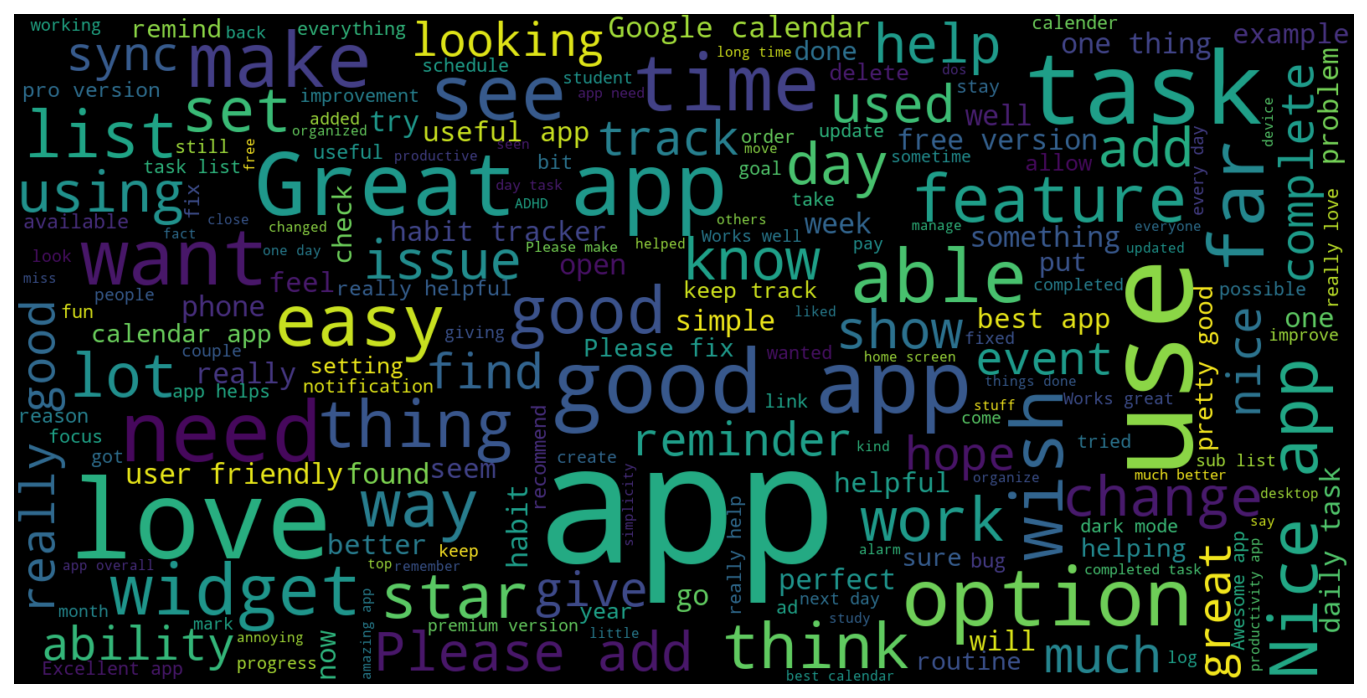

In [18]:
pos_reviews = new_df[new_df.score == 4]
pos_string = []
for t in pos_reviews.content:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

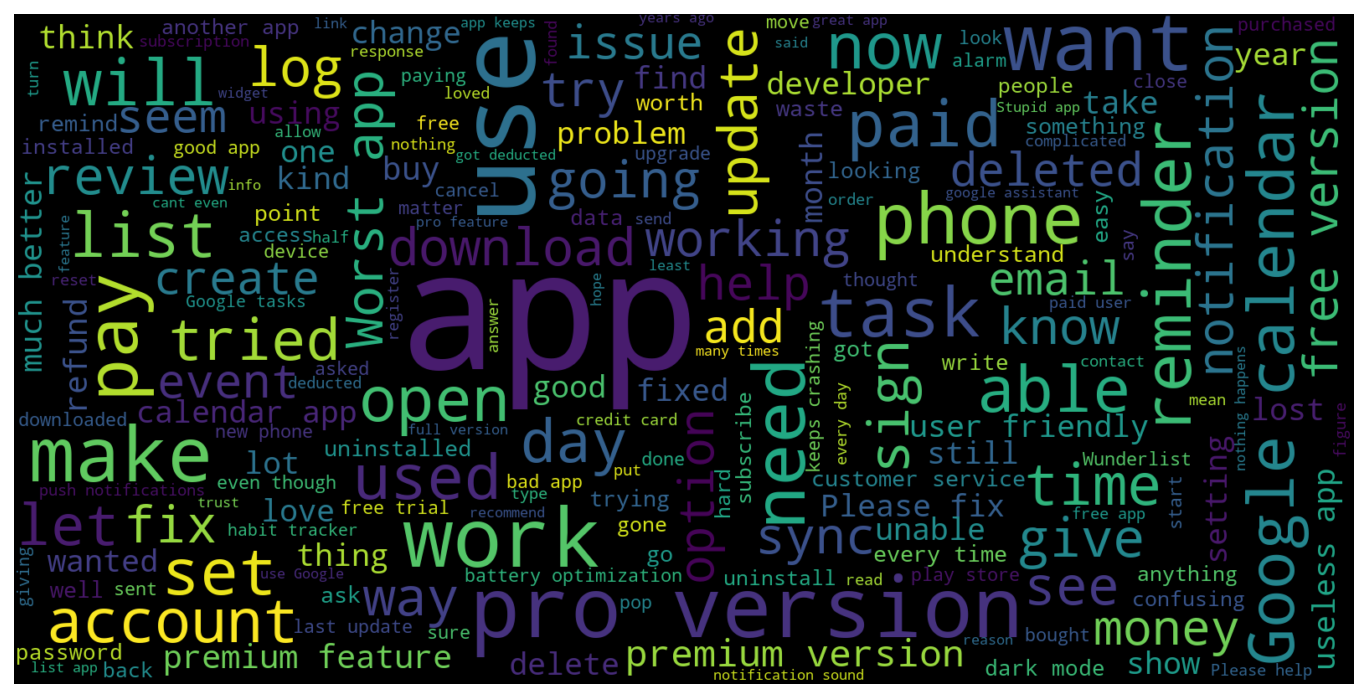

In [19]:
neg_reviews = new_df[new_df.score == 1]
neg_string = []
for t in neg_reviews.content:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()